In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('wine.csv')
df


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


# 2 .Examine the distribution of features using histograms, box plots, or density plots:


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


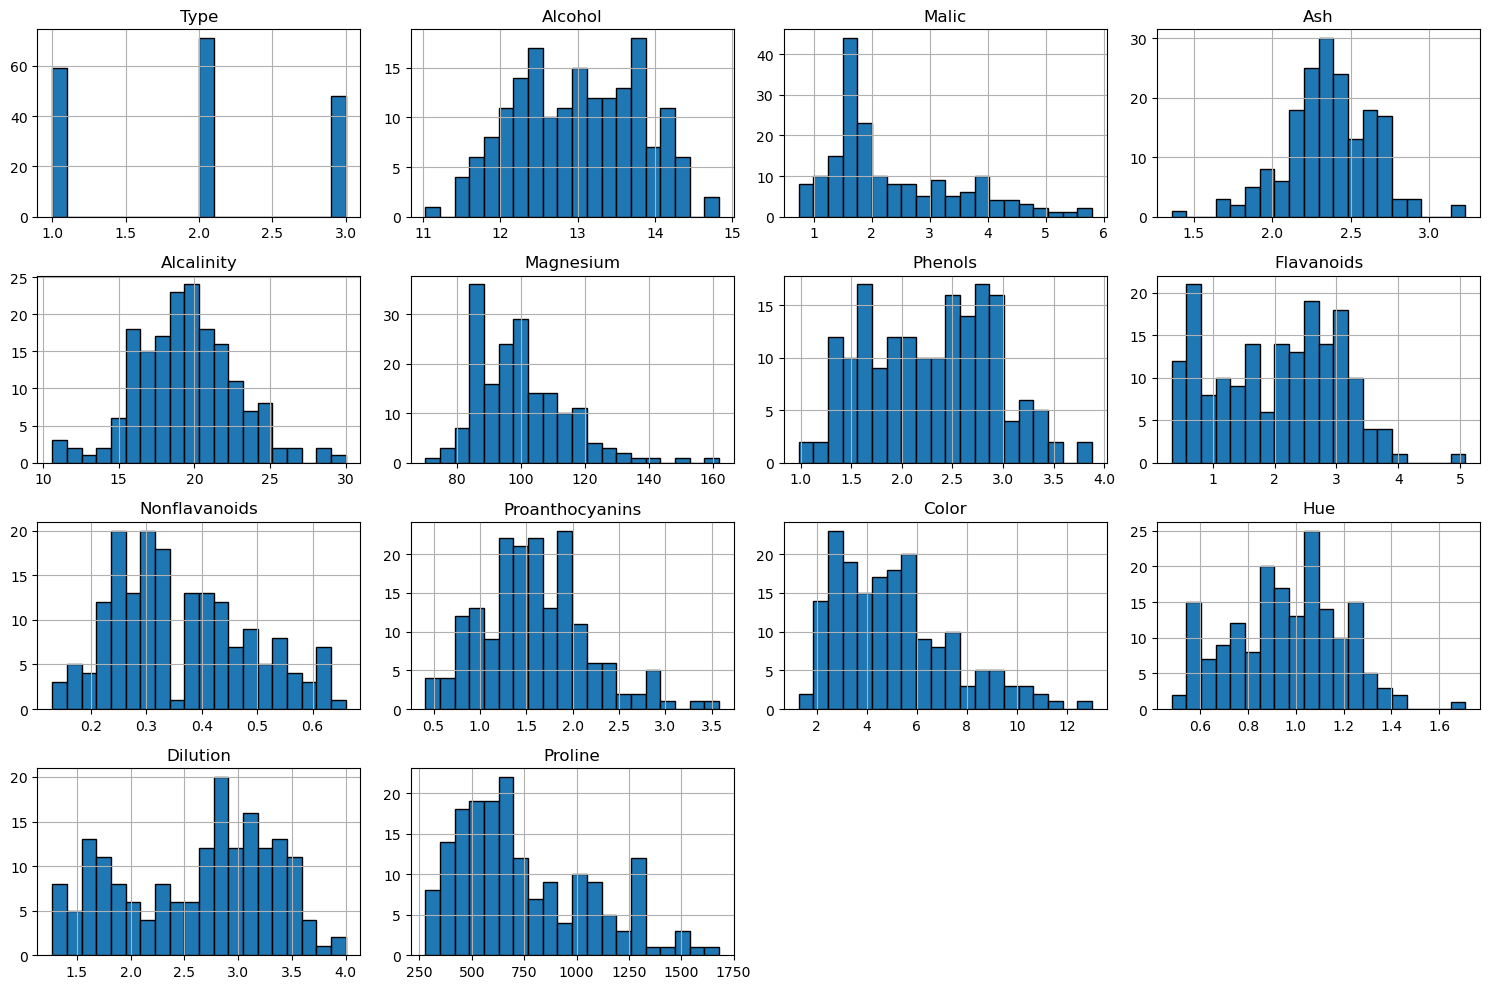

In [5]:
# Plot histograms for all features
df.hist(figsize=(15, 10), bins=20, edgecolor='k')
plt.tight_layout()
plt.show()

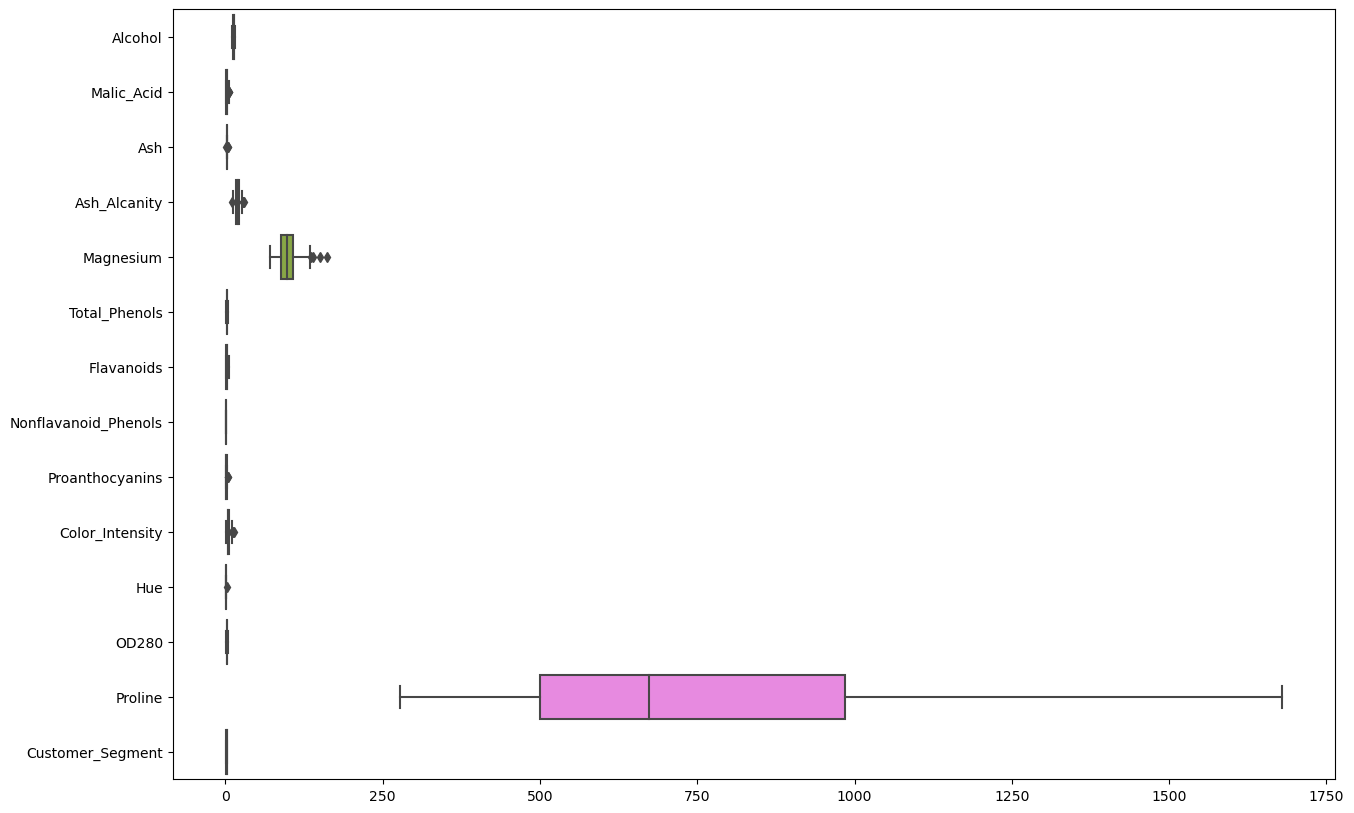

In [24]:
# Plot box plots for all features
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient='h')
plt.show()

# 3 .Investigate correlations between features to understand relationships within the data:


In [25]:
# Compute the correlation matrix
corr = df.corr()


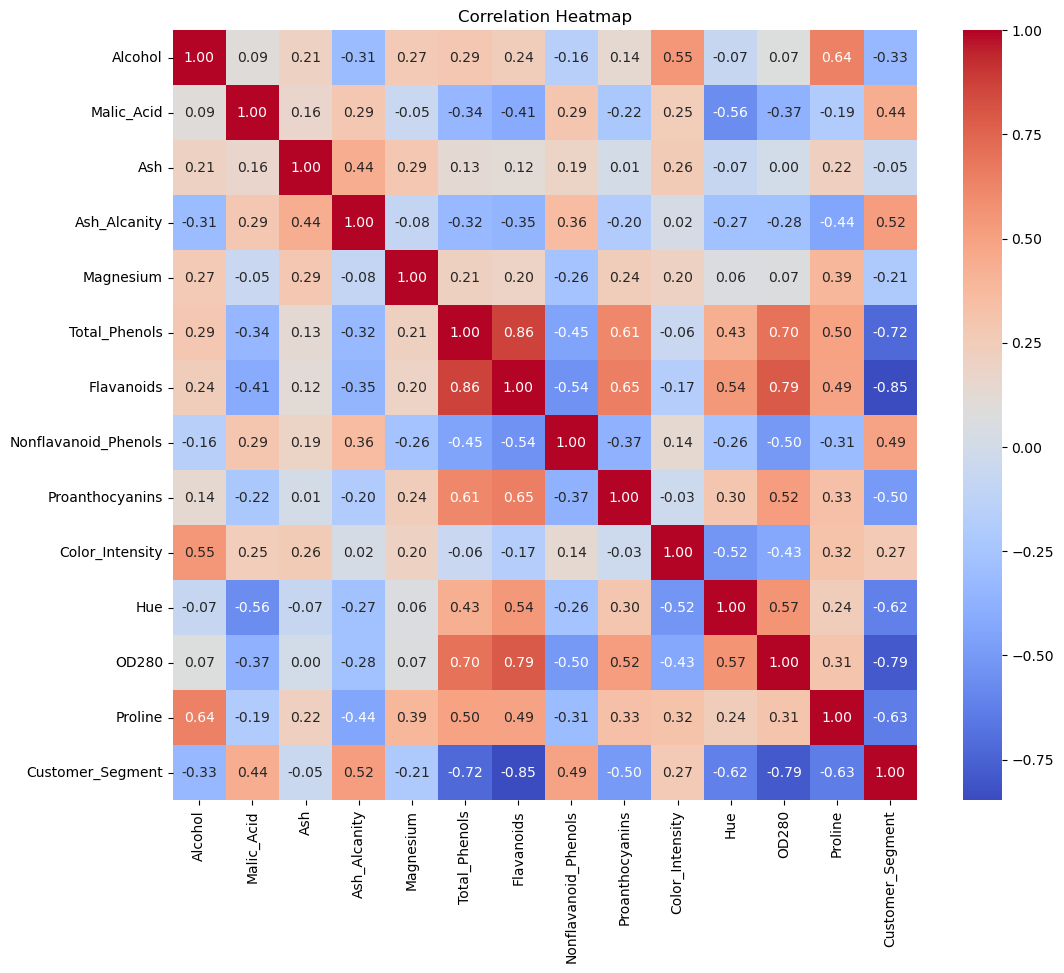

In [26]:
# Plot heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Task 2: Dimensionality Reduction with PCA
#### Standardize the features:

In [27]:
from sklearn.preprocessing import StandardScaler


In [28]:
# Separate features from target (if the last column is the target)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]  # Assuming the target column is the last one


In [29]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Implement PCA to reduce the dimensionality of the dataset:


In [30]:
from sklearn.decomposition import PCA


In [31]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


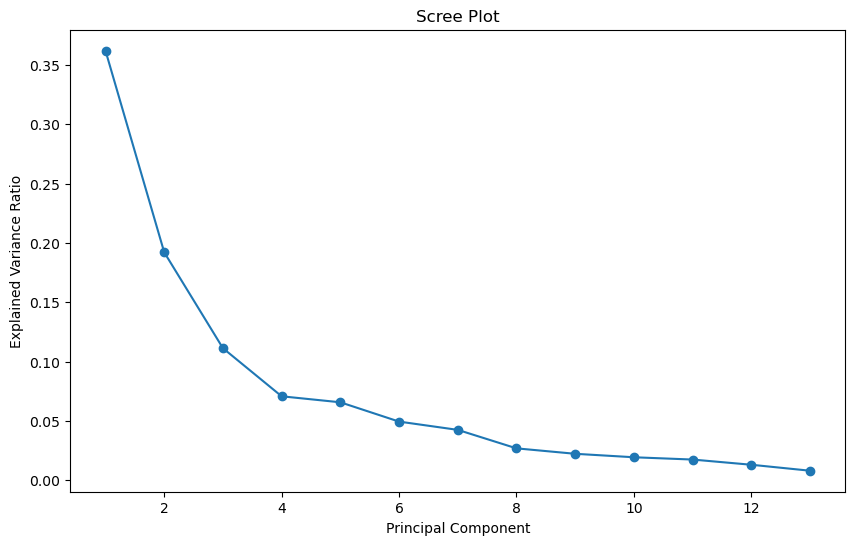

In [32]:
# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, X_scaled.shape[1] + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()


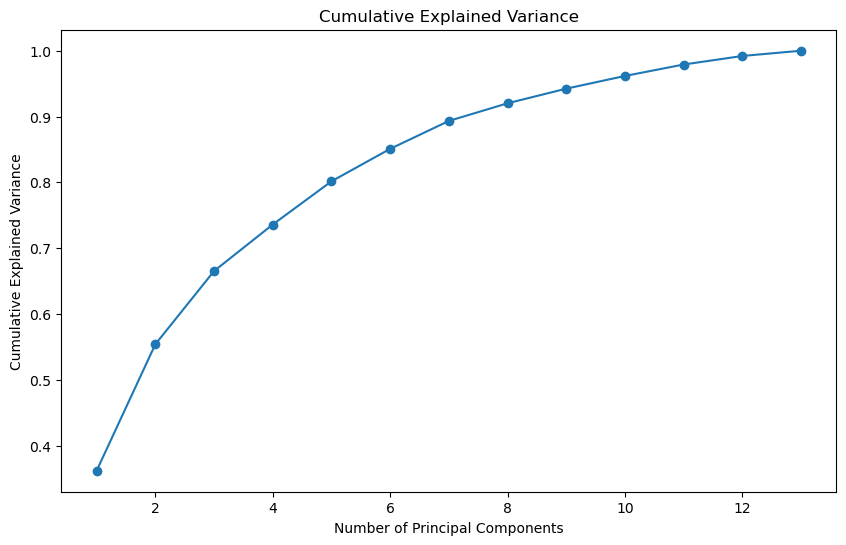

In [33]:
# Plot cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, X_scaled.shape[1] + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# 3.Transform the original dataset into the principal components:

In [34]:
# Choose the number of principal components (e.g., 2 or 3 for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#  3: Clustering with Original Data
Apply a clustering algorithm (e.g., K-means) to the original dataset:



In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [36]:
# Apply K-means with a chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans.fit_predict(X_scaled)


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [37]:
# Evaluate clustering performance
silhouette_avg = silhouette_score(X_scaled, clusters_original)
db_index = davies_bouldin_score(X_scaled, clusters_original)

In [38]:
print(f"K-Means Silhouette Score (Original Data): {silhouette_avg}")
print(f"K-Means Davies–Bouldin Index (Original Data): {db_index}")

K-Means Silhouette Score (Original Data): 0.2848589191898987
K-Means Davies–Bouldin Index (Original Data): 1.389187977718165


# 2.Visualize the clustering results using appropriate plots

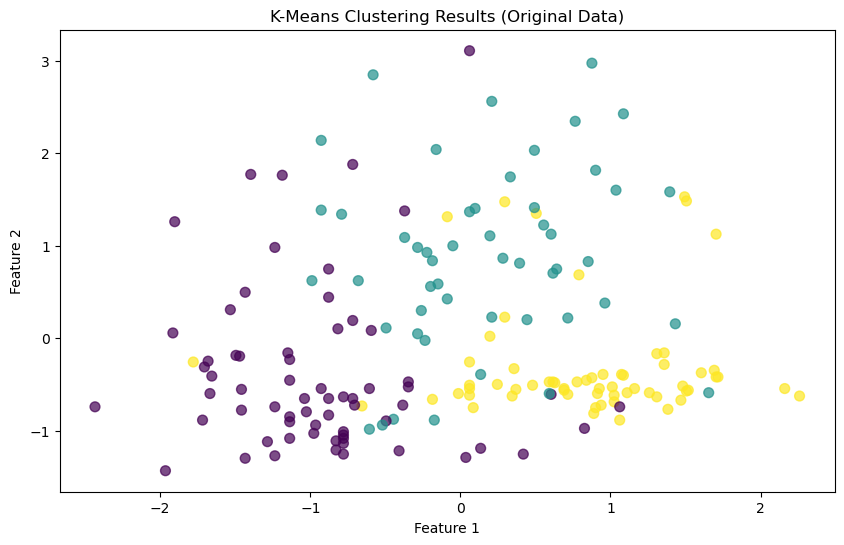

In [39]:
# Plot clustering results
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_original, cmap='viridis', s=50, alpha=0.7)
plt.title('K-Means Clustering Results (Original Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

#  4: Clustering with PCA Data
Apply the same clustering algorithm to the PCA-transformed dataset:


In [40]:
# Apply K-means to PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [41]:
# Evaluate clustering performance
silhouette_avg_pca = silhouette_score(X_pca, clusters_pca)
db_index_pca = davies_bouldin_score(X_pca, clusters_pca)

print(f"K-Means Silhouette Score (PCA Data): {silhouette_avg_pca}")
print(f"K-Means Davies–Bouldin Index (PCA Data): {db_index_pca}")

K-Means Silhouette Score (PCA Data): 0.5610505693103248
K-Means Davies–Bouldin Index (PCA Data): 0.5972661544221362


# 2.Visualize the clustering results obtained from PCA-transformed data:

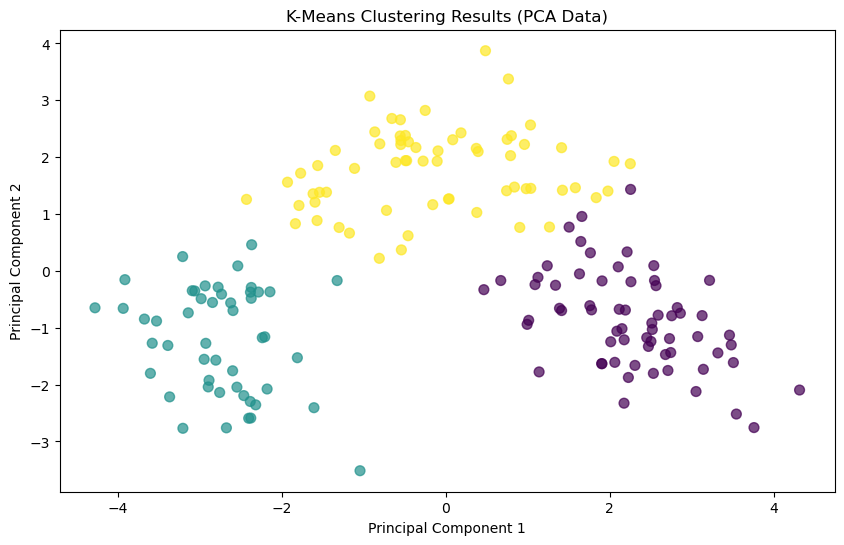

In [42]:
# Plot clustering results in PCA space
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_pca, cmap='viridis', s=50, alpha=0.7)
plt.title('K-Means Clustering Results (PCA Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [43]:
#3.Compare the clustering results from PCA-transformed data with those from the original dataset:
# You can compare clustering results manually by examining the scatter plots and performance metrics

# Task 5: Comparison and Analysis
###### Compare the clustering results obtained from the original dataset and PCA-transformed data:
- Review the clustering visualizations and metrics from both original and PCA-transformed datasets to see how clustering results differ.

- Discuss any similarities or differences observed in the clustering results:
###### Analyze any patterns or differences in cluster formations between the two approaches.
Reflect on the impact of dimensionality reduction on clustering performance:
Consider how PCA affected clustering performance and if dimensionality reduction led to more meaningful or less meaningful clusters.
###### Analyze the trade-offs between using PCA and clustering directly on the original dataset:
Discuss trade-offs such as loss of information versus improved clustering performance or computational efficiency.

#  6: Conclusion and Insights
Summarize the key findings and insights from the assignment:
python
Copy code
###### Write a summary of findings based on your analyses
Discuss the practical implications of using PCA and clustering in data analysis:
python
Copy code
###### Discuss how PCA and clustering can be applied in real-world scenarios
Provide recommendations for when to use each technique based on the analysis conducted:
python
Copy code
###### Provide practical recommendations based on your findings
Feel free to adjust the number of clusters or principal components based on your specific dataset and goals. This code provides a comprehensive approach to analyzing and clustering the Wine dataset.





